In [28]:
import numpy as np
import pandas as pd

from sentence_transformers import util #SentenceTransformer,
import torch
from torchtext.data import get_tokenizer
from torchtext.vocab import GloVe

OSError: /home/cas/.local/lib/python3.10/site-packages/torchtext/lib/libtorchtext.so: undefined symbol: _ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIlEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE

In [2]:
df = pd.read_csv("data/upsampled_large.csv")

In [3]:
df.head()

,Unnamed: 0,head,Body ID,Stance,body
0,49971,Ann Arbor pizza delivery driver surprised with...,2532,agree,"ANN ARBOR, Mich. – A pizza delivery man in Mic..."
1,33707,Who Should Play Steve Jobs Now That Christian ...,1846,agree,Christian Bale will not be starring as Steve J...
2,33710,Michael Phelps' girlfriend was born male but d...,1847,agree,"Before he checked into rehab in September, Mic..."
3,33711,Michael Phelps’ alleged girlfriend says she wa...,1847,agree,"Before he checked into rehab in September, Mic..."
4,33712,Michael Phelps Sex Scandal: Troubled Olympian’...,1847,agree,"Before he checked into rehab in September, Mic..."


In [66]:
tokenizer = get_tokenizer("basic_english")
max_words = 20
embed_len=300
global_vectors = GloVe(name='840B', dim=embed_len)

In [ ]:
# takes string, return 6000 dim GloVe vector
def to_vector(s):
    X = tokenizer(s)
    # fill / cut tokens to max size
    if len(X) < max_words:
        X = X+[""]*(max_words-len(X))
    else:
        X = X[:max_words]

    X_tensor = torch.zeros(1, max_words, embed_len)
    for i, j in enumerate(X):
        X_tensor[0][i] = global_vectors.get_vecs_by_tokens(j)
    return(X_tensor.reshape(1, -1))

In [26]:
def cosim(row):
    # define embedding method here
    #cs = model.encode([row["head"], row["body"]])
    x = to_tfidf(row)

    # compute cosine similarity
    return util.cos_sim(x[0], x[1])

In [103]:

samples = 50
avg_class_cs = {}

stances = ["agree", "disagree", "discuss", "unrelated"]

for stance in stances:
    # initialize 
    cs = []
    for i in range(samples):

        # all rows with the stance
        stance_df = df[(df["Stance"] == stance)]
        cs += cosim(stance_df.iloc[i])
    
    avg_class_cs[stance] = sum(cs) / len(cs)


In [104]:
avg_class_cs

{'agree': tensor([0.6289]), 'disagree': tensor([0.6085])}

/usr/lib/python3/dist-packages/numpy/lib/stride_tricks.py:536: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
/usr/lib/python3/dist-packages/numpy/lib/stride_tricks.py:536: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
/usr/lib/python3/dist-pack

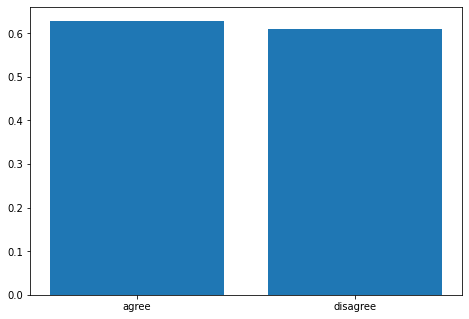

In [108]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['agree', "disagree"]
students = [avg_class_cs["agree"], avg_class_cs["disagree"]]
ax.bar(langs,students)
plt.show()